In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

In [2]:
# 数据导入与查看
data = pd.read_csv("./cybersecurity_data.csv")

In [3]:
#初步查看数据
print(data.keys())

Index(['battVoltage', 'battTemp', 'battLevel', 'battLevelDiff',
       'binderTransaction', 'binderReply', 'binderAcquire', 'binderRelease',
       'binderActiveNodes', 'binderTotalNodes', 'binderActiveRef',
       'binderTotalRef', 'binderActiveDeath', 'binderTotalDeath',
       'binderActiveTransaction', 'binderTotalTransaction',
       'binderActiveTransactionComplete', 'binderTotalTransactionComplete',
       'binderTotalNodesDiff', 'binderTotalRefDiff', 'binderTotalDeathDiff',
       'binderTotalTransactionDiff', 'binderTotalTransactionCompleteDiff',
       'cpuUsage', 'memActive', 'memInactive', 'memMapped', 'memFreePages',
       'memAnonPages', 'memFilePages', 'memDirtyPages', 'memWritebackPages',
       'networkTotalTXPackets', 'networkTotalTXBytes', 'networkTotalRXPackets',
       'networkTotalRXBytes', 'networkTotalTXPacketsDiff',
       'networkTotalTXBytesDiff', 'networkTotalRXPacketsDiff',
       'networkTotalRXBytesDiff', 'permissions', 'class'],
      dtype='object')


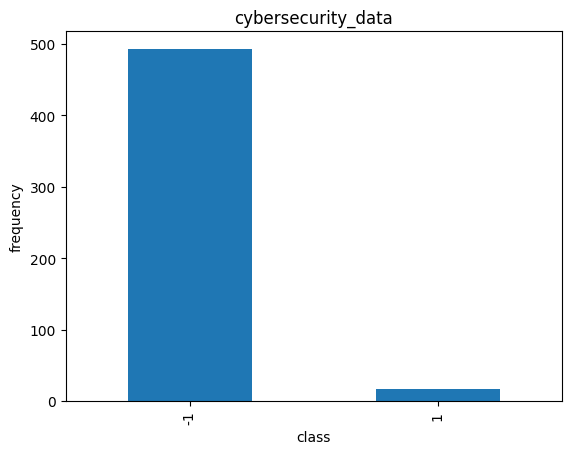

In [4]:
# 查看标签分布
count_classes = pd.value_counts(data['class'], sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title("cybersecurity_data")
plt.xlabel("class")
plt.ylabel("frequency")
plt.show()

In [5]:
X = data.iloc[:, data.columns != 'class']
y = data.iloc[:, data.columns == 'class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
bag_clf=BaggingClassifier(SVC(),n_estimators=10,bootstrap=True,max_samples=0.5)
bag_clf.fit(X_train, y_train)
y_pred=bag_clf.predict(X_test)

C:\Users\20450\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[0][0] 
FN = cm[0][1] 
FP = cm[1][0] 
TN = cm[1][1]
acc = (TP + TN) / (TP + FN + FP + TN)
print(bag_clf.__class__.__name__,'准确率=',acc)
sensitivity = TP / (TP + FN)
print(bag_clf.__class__.__name__,'sensitivity=',sensitivity)
specificity = TN / (TN + FP)
print(bag_clf.__class__.__name__,'specificity=',specificity)
precision=TP/(TP+FP)
print(bag_clf.__class__.__name__,'precision=',precision)
F1_score=2*precision*sensitivity/(precision+sensitivity)
print(bag_clf.__class__.__name__,'F1_score=',F1_score)
print(classification_report(y_test,y_pred ))

BaggingClassifier 准确率= 0.9607843137254902
BaggingClassifier sensitivity= 1.0
BaggingClassifier specificity= 0.0
BaggingClassifier precision= 0.9607843137254902
BaggingClassifier F1_score= 0.98
              precision    recall  f1-score   support

          -1       0.96      1.00      0.98        98
           1       0.00      0.00      0.00         4

    accuracy                           0.96       102
   macro avg       0.48      0.50      0.49       102
weighted avg       0.92      0.96      0.94       102



C:\Users\20450\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20450\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\20450\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [8]:
# recall_acc=recall_score(y_test,y_pred)
# print(bag_clf.__class__.__name__,'召回率=', recall_acc)
# accuracy_acc=accuracy_score(y_test,y_pred)
# print(bag_clf.__class__.__name__,'准确率=',accuracy_acc)
# precision_acc=precision_score(y_test,y_pred)
# print(bag_clf.__class__.__name__,'精确率=',precision_score(y_test,y_pred))
# metrics_out=confusion_matrix(y_test,y_pred)
# Specificity = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
# print(bag_clf.__class__.__name__,'特异度=',Specificity)

<Figure size 640x480 with 0 Axes>

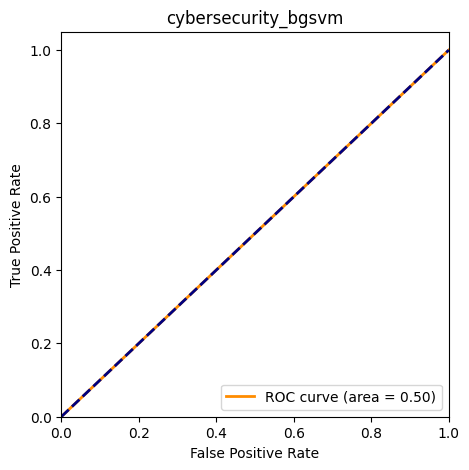

In [9]:
#ROC曲线
# 计算
fpr, tpr, thread = roc_curve(y_test, y_pred)
roc_auc= auc(fpr, tpr)
# 绘图
plt.figure()
lw = 2
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('cybersecurity_bgsvm')
plt.legend(loc="lower right")
plt.show()